<b><h2 id="toc">Table of Contents</h2></b>
<br>
<ol>
    <li>
        <a href="#1"><b>Problem Statement</b><a>
    </li>
    <br>
    <li>
        <b><a href="#2">Loading Dataset</a></b>
    </li>
    <br>
    <li>
        <b><a href="#3">Creating Profile Reports</a></b>
        <ul>
            <li>
                <a href="#3.1">Dataset Understanding</a>
            </li>
            <li>
                <a href="#3.2">Before Preprocessing</a>
            </li>
            <li>
                <a href="#3.3">After Preprocessing</a>
            </li>
        </ul>
    </li>       
    <br>
    <li>
        <b><a href="#4">Data Analysis</a></b>
        <ul>
            <li>
                <a href="#4.1">Question 1.</a>
            </li>
            <li>
                <a href="#4.2">Question 2.</a>
            </li>
            <li>
                <a href="#4.3">Question 3.</a>
            </li>
            <li>
                <a href="#4.4">Question 4.</a>
            </li>
            <li>
                <a href="#4.5">Question 5.</a>
                <ol>
                    <ul>
                        <li>
                            <a href="#4.5.1">Question 5.1.</a>
                        </li>
                        <li>
                            <a href="#4.5.2">Question 5.2.</a>
                        </li>
                    </ul>
                </ol>              
            </li>
        </ul>
    </li>
    <br>
    <li>
        <b><a href="#5">Conclusion</a></b>
    </li>
</ol>
    
    
        
    

<a name="1"></a>
<h3 id="ps">1. Problem Statement</h3>

<p> 
    This jupyter notebook contains a detailed analysis of movies(imdb) dataset, which has been imported from
    github. I t will illustrate only the basic commands of Python executed in reference to the provided dataset.
</p>
<a name="2"></a>
<h3 id="ldata">2. Loading Dataset</h3>
<p>
    <img src="https://m.media-amazon.com/images/G/01/imdb/images-ANDW73HA/imdb_fb_logo._CB1542065250_.png">
</p>
<ul>
    <li>
        The dataset consists of information about the movies mentioned in IMDB. Features used for giving the details of the
        movies are: star_rating, content_rating, genre, duration, title and actors' list.
    </li>
</ul>
<h4 id="ip">Importing Packages</h4>


In [54]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
sns.set_style("dark")
sns.set()

from subprocess import check_output

%matplotlib inline

<h4 id="imdata">Importing the Dataset</h4>

In [145]:
import pandas as pd
imdb = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/imdb_1000.csv")
imdb.head()


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


<h4 id="copy">Creating a copy</h4>
<p>
    Creating a copy of IMDB dataset before performing any further operations.
</p>

In [146]:
imdb_copy = imdb
imdb_copy.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [147]:
imdb_actors = imdb_copy
imdb_actors.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


<a name="3"></a>
<h3 id="cpr">3. Creating Profile Reports</h3>
    <ul>
            <li>
                First section contains the understanding of data, its shape, information, not null and null values, etc. In 
                profile reports, firstly, we create a report before preprocessing, then a preprocessing profile report and
                finally, a report after preprocessing, checking how preprocessing has changed our data.
            </li>
    </ul>

<a name="3.1"></a>    
<h4 id="datau">3.1 Dataset Understanding</h4>
<p>
    <b>.format()</b> returns the value we wish to put into the placeholders and concatenate with the string passed as               parameters into the format function.<br>
    <b>.shape</b> returns the dimensions of the array.<br>
    <b>.columns</b> returns the column labels of the dataset
</p>
<a name="3.2"></a>
<h4 id="befp">3.2 Before Processing</h4>
<ul>
    <li>
        An easy to understand, readable and qualitative HTML report is generated which consists of detailed report about
        the attributes, dimensions, minimum and maximum values, mean, median, mode, etc. of the present columns of the
        dataset.
    </li>
    <li>
        A descriptive visual interpretation of column-wise data and the spread of the data is mentioned in the report.
    </li>
    <li>
        Fine and clear dataset analysis is provided.
    </li>
</ul>

<p>
    Here, I have created a profile report before performing processing, that is why it has been named as: 
    "imdb_before_processing.html".
</p>


In [43]:
print("Movie details: \n{} \n {}".format(imdb_copy.shape, imdb_copy.columns))

Movie details: 
(979, 6) 
 Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')


<p>
    <b>.tail()</b> returns the last 5 rows of the dataset.
</p>

In [55]:
imdb_copy.tail()

,star_rating,title,content_rating,genre,duration,actors_list
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."


<p>
    <b>.info()</b> is used to get the concise summary of the dataframe.
</p>

In [45]:
imdb_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


<p>
    <b>describe()</b> is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a           series of numeric values.
</p>

In [46]:
imdb_copy.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [47]:
profile = pandas_profiling.ProfileReport(imdb_copy)
profile.to_file(outputfile = "C:\\INSAIDTerm1\\imdb_before_processing.html")

<p>
    <b>.isnull()</b> shows the presence of null values in columns.<br>
    <b>.sum()</b> shows the sum of values.<br><br>
    <b>Replace missing values in content_rating.</b>
</p>

In [48]:
imdb_copy['content_rating'].isna().sum()
imdb_copy['content_rating'].fillna(value = 'NOT RATED', inplace = True)
imdb_copy['content_rating'].unique()

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', 'TV-MA', 'GP', 'NC-17'], dtype=object)

<a name="3.3"></a>
<h4 id="aftp">3.3 After Processing</h4>
<p>
    Here, preprocessing is performed on the dataset after the transformation. So, the changes may reflect in the form of: 
    "imdb_after_processing.html".<br><br>
    <b>After Cleaning the data.</b>
</p>

In [49]:
profile = pandas_profiling.ProfileReport(imdb_copy)
profile.to_file(outputfile = "C:\\INSAIDTerm1\\imdb_after_processing.html")
imdb_copy.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


<a name="4"></a>
<h3 id="dana">4. Data Analysis</h3>
<a name="4.1"></a>
<h4 id="q1">Question 1. Which genre was the most widely preferred among all movies ?</h4>
<h4 id="a1">Answer 1.</h4>

<p>
    The most preferred genre being Drama as per the data provided, explanation to be given in the slide presentation
    of this graph.
</p>



Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64


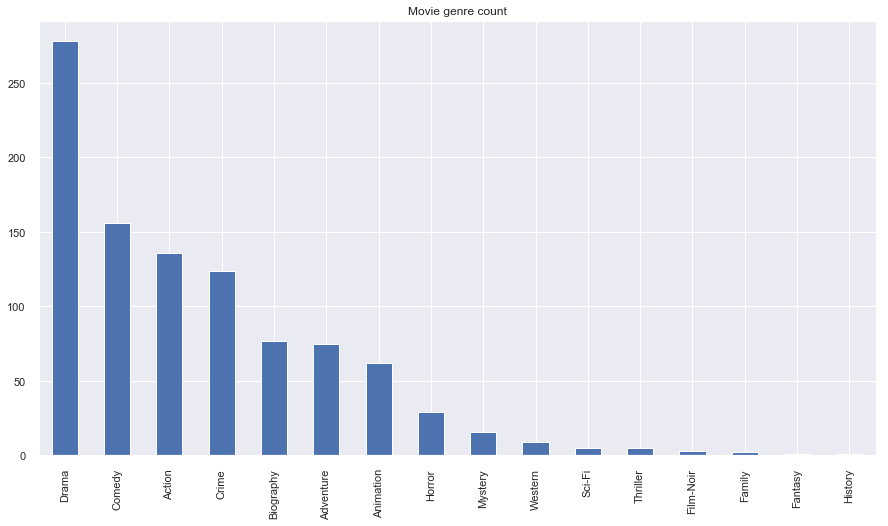

In [56]:
imdb_copy.genre.value_counts().plot(kind='bar', title="Movie genre count", figsize=(15, 8))
print(imdb_copy.genre.value_counts())
plt.show()

<h4 id="samp">Iluustrating the use of .sample()</h4>
<p>
    .sample() provides randomly selected data, here it is representing 10 randomly selected rows.
</p>

In [57]:
imdb_copy.sample(10)

,star_rating,title,content_rating,genre,duration,actors_list
57,8.5,Alien,R,Horror,117,"[u'Sigourney Weaver', u'Tom Skerritt', u'John ..."
898,7.5,The Mission,PG,Adventure,125,"[u'Robert De Niro', u'Jeremy Irons', u'Ray McA..."
287,8.1,His Girl Friday,APPROVED,Comedy,92,"[u'Cary Grant', u'Rosalind Russell', u'Ralph B..."
349,8.0,District 9,R,Action,112,"[u'Sharlto Copley', u'David James', u'Jason Co..."
695,7.7,Y Tu Mama Tambien,R,Drama,106,"[u'Maribel Verd\xfa', u'Gael Garc\xeda Bernal'..."
29,8.6,City Lights,PASSED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."
404,7.9,The Remains of the Day,PG,Drama,134,"[u'Anthony Hopkins', u'Emma Thompson', u'John ..."
520,7.8,Back to the Future Part II,PG,Adventure,108,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
402,7.9,Once,R,Drama,85,"[u'Glen Hansard', u'Mark\xe9ta Irglov\xe1', u'..."
807,7.6,The Assassination of Jesse James by the Coward...,R,Biography,160,"[u'Brad Pitt', u'Casey Affleck', u'Sam Shepard']"


<a name="4.2"></a>
<h4 id="q2">Question 2. Which content-rating is the most preferred in movies ?</h4>
<h4 id="a2">Answer 2.</h4>
<p>
     The most preferred content-rating is R rated, as per the analysis.
</p>

       Rating  Count
8           R    460
7       PG-13    189
6          PG    123
4   NOT RATED     68
0    APPROVED     47
10    UNRATED     38
1           G     32
3       NC-17      7
5      PASSED      7
11          X      4
2          GP      3
9       TV-MA      1


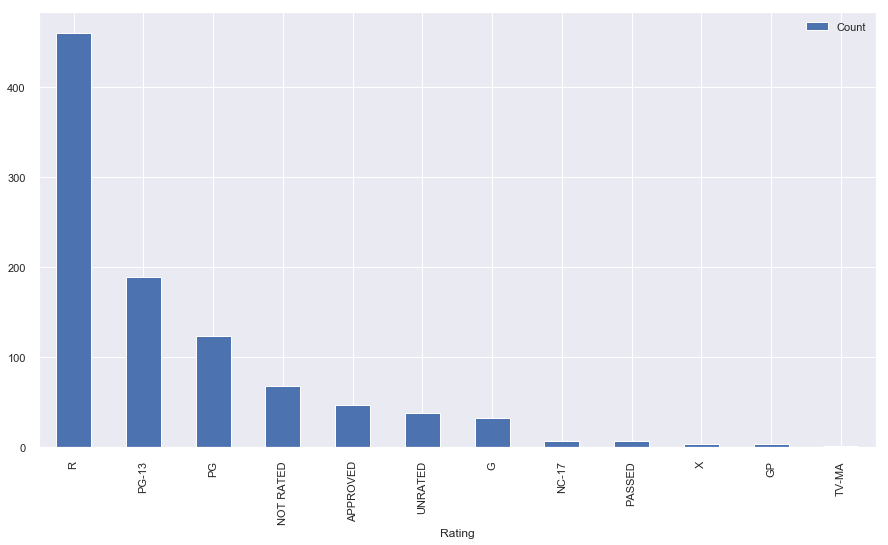

In [58]:
imdb_copy['content_rating'].loc[imdb_copy['content_rating'] == 'NOT RATED'].count()
df = imdb_copy.groupby(['content_rating'])['star_rating'].count().reset_index()
df = df.rename(columns = {'content_rating':'Rating', 'star_rating':'Count'}).sort_values(by=['Count'], ascending = False)
print(df)
df.plot.bar(x = 'Rating', y = 'Count', figsize=(15, 8))

<a name="4.3"></a>
<h4 id="q3">Question 3. Classifying movies as short movie, if there duration is less than 100 minutes and the most preferred genre in short movies.</h4>
<h4 id="a3">Answer 3.</h4>
<p>
    Movies have been classified as short movie as per the condition and the most preferred genre in short movies is Comedy.
</p>

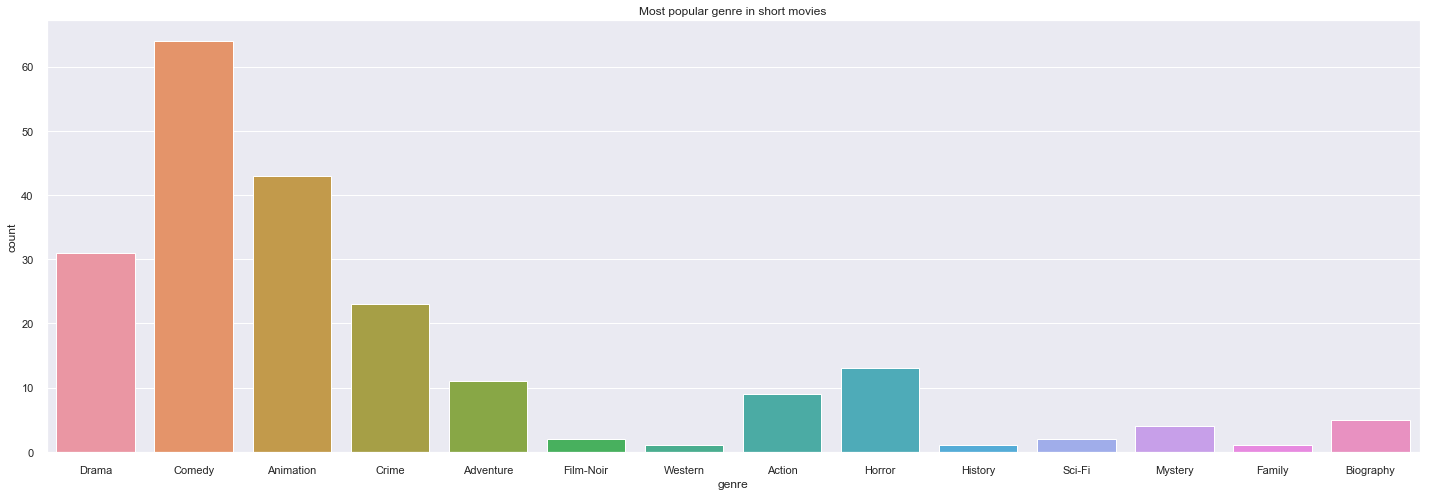

In [154]:
short_movies = imdb_copy[imdb_copy['duration'] <= 100]
short_movies.sample(10)
plt.figure(figsize=(20,7))
sns.countplot( x ='genre', data = short_movies).set_title('Most popular genre in short movies')
plt.tight_layout()
plt.show()

<a name="4.4"></a>
<h4 id="q4">Question 4. Which star-rating has the highest movie count ?</h4>
<h4 id="a4">Answer 4.</h4>
<p>
    The star-rating with the highest movie count is 7.6.
</p>

     Star Rating  Movie Count
2            7.6          124
4            7.8          116
3            7.7          113
1            7.5          108
7            8.1          103
6            8.0           97
5            7.9           75
8            8.2           51
0            7.4           49
9            8.3           43
10           8.4           37
11           8.5           23
12           8.6           15
13           8.7           10
15           8.9            6
14           8.8            5
16           9.0            1
17           9.1            1
18           9.2            1
19           9.3            1


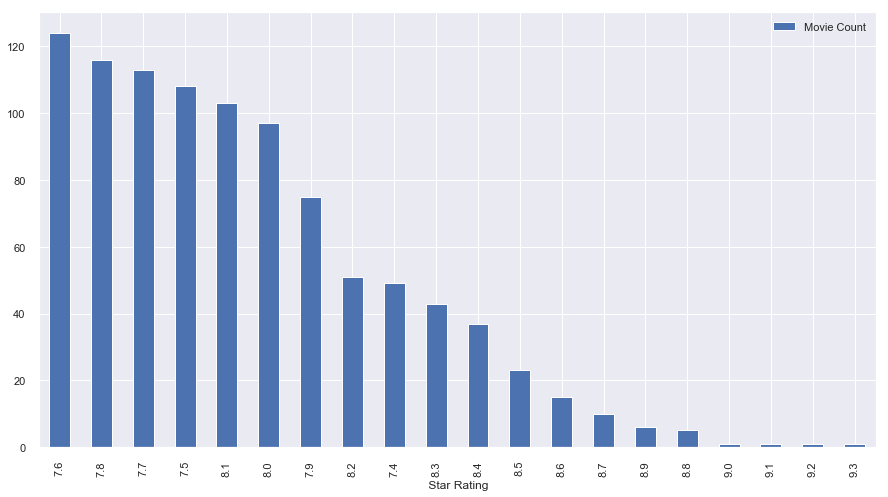

In [77]:
df = imdb_copy.groupby(['star_rating'])['title'].count().reset_index()
df = df.rename(columns = {'star_rating':' Star Rating', 'title':'Movie Count'}).sort_values(by=['Movie Count'], ascending = False)
print(df)
df.plot.bar(x = ' Star Rating', y = 'Movie Count', figsize=(15, 8))

<h4 id="scp">Scatter plot of sample data for duration and star-rating.</h4>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


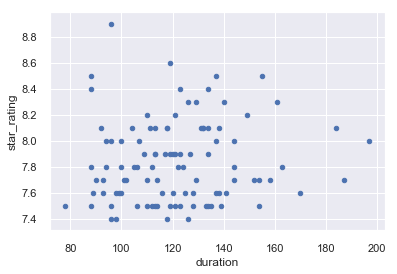

In [166]:
imdb_copy.sample(100).plot.scatter(x='duration',y='star_rating')

<h4 id="hex">Hexplot for short movies using sample data.</h4>

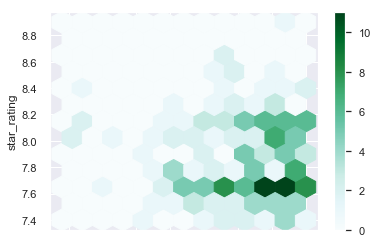

In [73]:
imdb_copy[imdb_copy['duration'] <= 100].plot.hexbin(x='duration',y='star_rating',gridsize=12)

<a name="4.5.1"></a>
<h4 id="q5">Question 5.1. Splitting up actors_list.</h4>
<h4 id="a5">Answer 5.1.</h4>
<p>
    Actors have been splitted up as Actor1, Actor2 and Actor3 lists.
</p>

In [148]:
print(imdb_copy.head(1))
newlist = imdb_actors['actors_list'].str.split(",", n = 2, expand = True)
imdb_actors['Actor1'] = newlist[0].str.replace('[', '').str.replace("u'", "").str.replace("'", "")
imdb_actors['Actor2'] = newlist[1].str.replace("u'", "").str.replace("'", "")
imdb_actors['Actor3'] = newlist[2].str.replace("u'", "").str.replace("]", "").str.replace("'", "")
imdb_actors.drop(columns =["actors_list"], inplace = True) 
imdb_actors.head(20)

   star_rating                     title content_rating  genre  duration  \
0          9.3  The Shawshank Redemption              R  Crime       142   

                                         actors_list  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  


,star_rating,title,content_rating,genre,duration,Actor1,Actor2,Actor3
0,9.3,The Shawshank Redemption,R,Crime,142,Tim Robbins,Morgan Freeman,Bob Gunton
1,9.2,The Godfather,R,Crime,175,Marlon Brando,Al Pacino,James Caan
2,9.1,The Godfather: Part II,R,Crime,200,Al Pacino,Robert De Niro,Robert Duvall
3,9.0,The Dark Knight,PG-13,Action,152,Christian Bale,Heath Ledger,Aaron Eckhart
4,8.9,Pulp Fiction,R,Crime,154,John Travolta,Uma Thurman,Samuel L. Jackson
5,8.9,12 Angry Men,NOT RATED,Drama,96,Henry Fonda,Lee J. Cobb,Martin Balsam
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,Clint Eastwood,Eli Wallach,Lee Van Cleef
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,Elijah Wood,Viggo Mortensen,Ian McKellen
8,8.9,Schindler's List,R,Biography,195,Liam Neeson,Ralph Fiennes,Ben Kingsley
9,8.9,Fight Club,R,Drama,139,Brad Pitt,Edward Norton,Helena Bonham Carter


<a name="4.5.2"></a>
<h4 id="q5.2.">Question 5.2. Analysing which actor has done the maximum number of movies among all and plotting the same.</h4>
<h4 id="a5.2.">Answer 5.2.</h4>
<p>
    Robert De Niro is the actor who has done the highest count of movies as per the analysis.
    <br>
    Grouping by for first list of actors.
</p>

              Actor  Movie
450  Robert De Niro     13
526       Tom Hanks     12
109  Clint Eastwood     11
297     Johnny Depp     10
7         Al Pacino     10


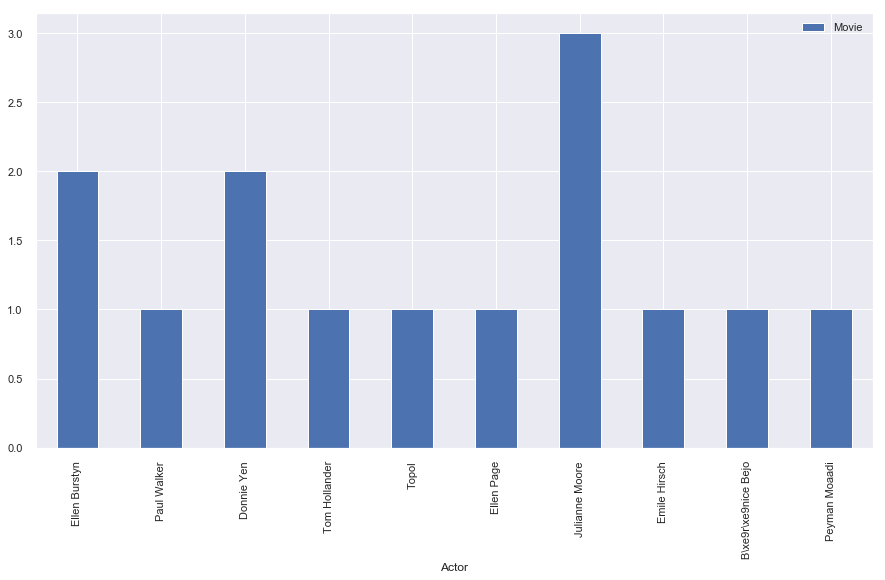

In [157]:
df = imdb_actors.groupby(['Actor1'])['title'].count().reset_index()
df = df.rename(columns = {'Actor1':'Actor', 'title':'Movie'}).sort_values(by=['Movie'], ascending = False)
print(df.head())
df.sample(10).plot.bar(x = 'Actor', y = 'Movie', figsize=(15, 8))

<p>
    Grouping by for second list of actors.
</p>

               Actor  Movie
191      Emma Watson      7
493       Matt Damon      6
404     Kate Winslet      6
232    Geoffrey Rush      5
89    Cate Blanchett      4


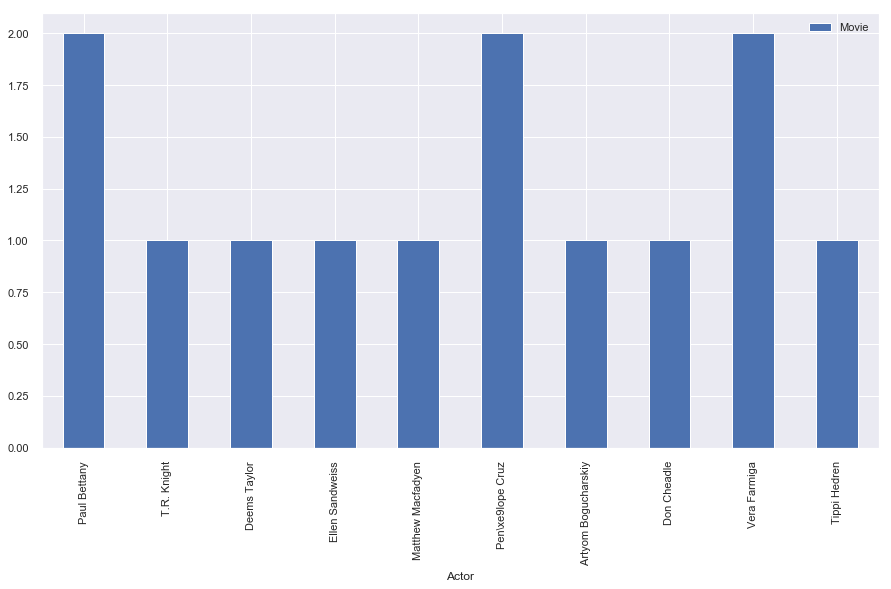

In [156]:
df = imdb_actors.groupby(['Actor2'])['title'].count().reset_index()
df = df.rename(columns = {'Actor2':'Actor', 'title':'Movie'}).sort_values(by=['Movie'], ascending = False)
print(df.head())
df.sample(10).plot.bar(x = 'Actor', y = 'Movie', figsize=(15, 8))

<p>
    Grouping by for third list of actors.
</p>

                   Actor  Movie
705         Rupert Grint      6
728   Scarlett Johansson      5
365    Jennifer Connelly      4
113        Carrie Fisher      4
426       Julianne Moore      4


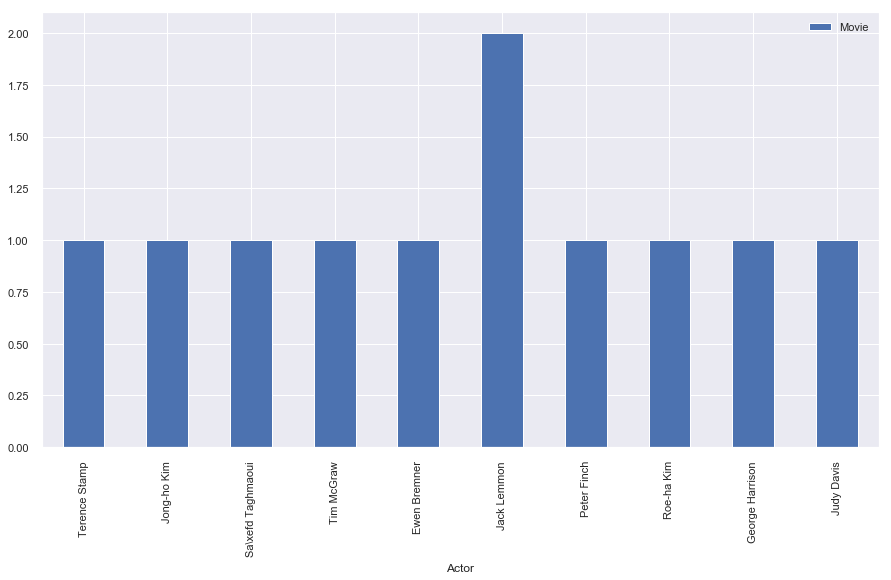

In [155]:
df = imdb_actors.groupby(['Actor3'])['title'].count().reset_index()
df = df.rename(columns = {'Actor3':'Actor', 'title':'Movie'}).sort_values(by=['Movie'], ascending = False)
print(df.head())
df.sample(10).plot.bar(x = 'Actor', y = 'Movie', figsize=(15, 8))

<a name="5"></a>
<h3 id="conc">5. Conclusion</h3>
<ul>
    <li>
        We have learnt performing exploratory data analysis and plotting using Pandas.
    </li>
    <li>
        We have made use of packages like matplotlib and seaborn to understand the data better.
    </li>
    <li>
        Using preprocessing for dealing with missing values and cleaning the data.
    </li>
    <li>
        Using pandas profiling to generate an html report having all the information of all the features in the                         dataset.
    </li>
    <li>
        This data analysis report will further help us to choose us the most favourable machine learning model.
    </li>
</ul>
        
        
        
        
  

